<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>IPL 2025 Auction Analysis: Unveiling the Bidding Strategies</b></div>

The IPL auction is a fascinating spectacle where cricketing talent meets financial strategy. With millions at stake, understanding the dynamics of player bidding can offer insights into team strategies and market trends. This notebook delves into the IPL 2025 auction data, exploring the nuances of player valuations and team compositions. If you find this analysis useful, consider upvoting it.

## Table of Contents
1. [Data Loading and Overview](#data-loading)
2. [Data Cleaning and Preparation](#data-cleaning)
3. [Exploratory Data Analysis](#eda)
4. [Team-wise Analysis](#team-analysis)
5. [Capped vs Uncapped Players](#capped-uncapped)
6. [Base Price vs Winning Bid](#base-winning-bid)
7. [Conclusion and Future Work](#conclusion)

## 1. Data Loading and Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the datasets
file_paths = [
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/GT_Players_List.csv',
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/RR_Players_List.csv',
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/LSG_Players_List.csv',
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/MI_Players_List.csv',
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/CSK_Players_List.csv',
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/SRH_Players_List.csv',
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/RCB_Players_List.csv',
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/PBKS_Players_List.csv',
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/DC_Players_List.csv',
    '/kaggle/input/tata-ipl-auction-2025-sold-players-dataset/KKR_Players_List.csv'
]

# Load all data into a single DataFrame
df_list = [pd.read_csv(file_path) for file_path in file_paths]
df = pd.concat(df_list, ignore_index=True)
df.head()

,Sr. No.,Player,Base Price,Winning Bid,Capped/Uncapped
0,1,Jos Buttler,20000000,157500000,Capped
1,2,Mohammad Siraj,20000000,122500000,Capped
2,3,Kagiso Rabada,20000000,107500000,Capped
3,4,Prasidh Krishna,20000000,95000000,Capped
4,5,Washington Sundar,20000000,32000000,Capped


## 2. Data Cleaning and Preparation

In [3]:
# Check for missing values
df.isnull().sum()

Sr. No.            0
Player             0
Base Price         0
Winning Bid        0
Capped/Uncapped    0
dtype: int64

In [4]:
# Check data types
df.dtypes

Sr. No.             int64
Player             object
Base Price          int64
Winning Bid         int64
Capped/Uncapped    object
dtype: object

In [5]:
# Convert 'Base Price' and 'Winning Bid' to integers if not already
df['Base Price'] = df['Base Price'].astype(int)
df['Winning Bid'] = df['Winning Bid'].astype(int)

## 3. Exploratory Data Analysis

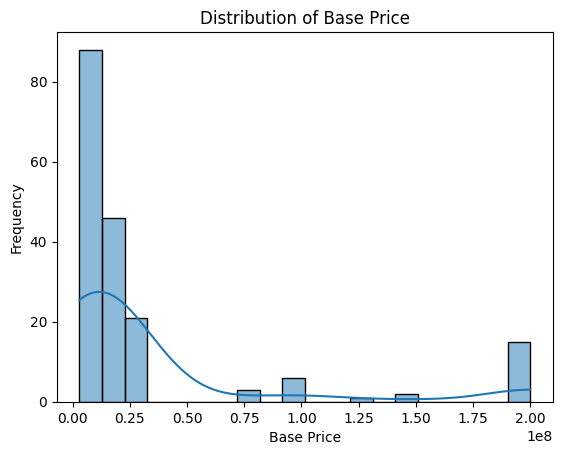

In [6]:
# Distribution of Base Price
sns.histplot(df['Base Price'], bins=20, kde=True)
plt.title('Distribution of Base Price')
plt.xlabel('Base Price')
plt.ylabel('Frequency')
plt.show()

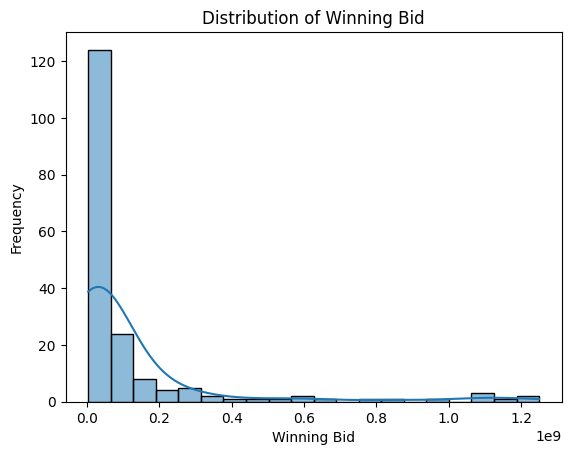

In [7]:
# Distribution of Winning Bid
sns.histplot(df['Winning Bid'], bins=20, kde=True)
plt.title('Distribution of Winning Bid')
plt.xlabel('Winning Bid')
plt.ylabel('Frequency')
plt.show()

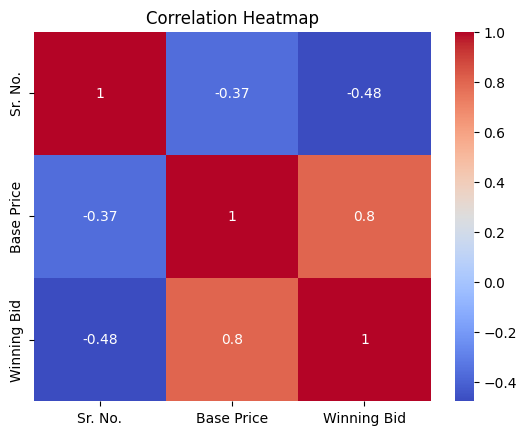

In [8]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 4. Team-wise Analysis

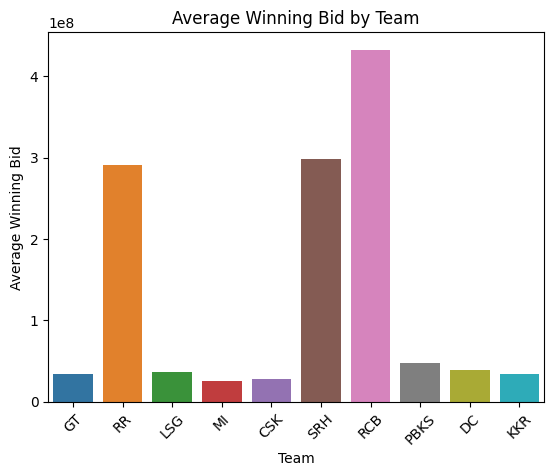

In [9]:
# Add a 'Team' column based on file names
team_names = ['GT', 'RR', 'LSG', 'MI', 'CSK', 'SRH', 'RCB', 'PBKS', 'DC', 'KKR']
for i, team_name in enumerate(team_names):
    df_list[i]['Team'] = team_name

# Concatenate again with team names
df = pd.concat(df_list, ignore_index=True)

# Average Winning Bid by Team
sns.barplot(x='Team', y='Winning Bid', data=df, ci=None)
plt.title('Average Winning Bid by Team')
plt.xlabel('Team')
plt.ylabel('Average Winning Bid')
plt.xticks(rotation=45)
plt.show()

## 5. Capped vs Uncapped Players

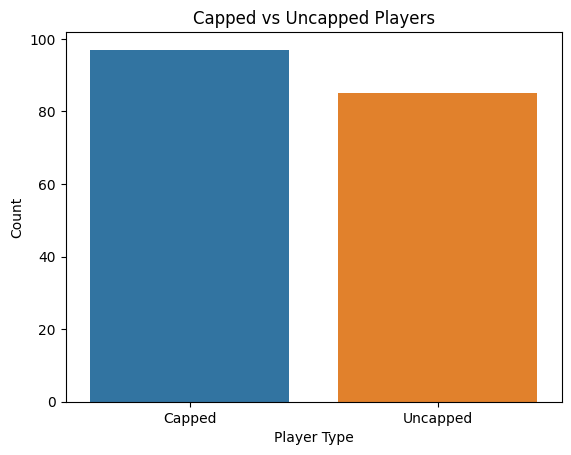

In [10]:
# Count of Capped vs Uncapped Players
sns.countplot(x='Capped/Uncapped', data=df)
plt.title('Capped vs Uncapped Players')
plt.xlabel('Player Type')
plt.ylabel('Count')
plt.show()

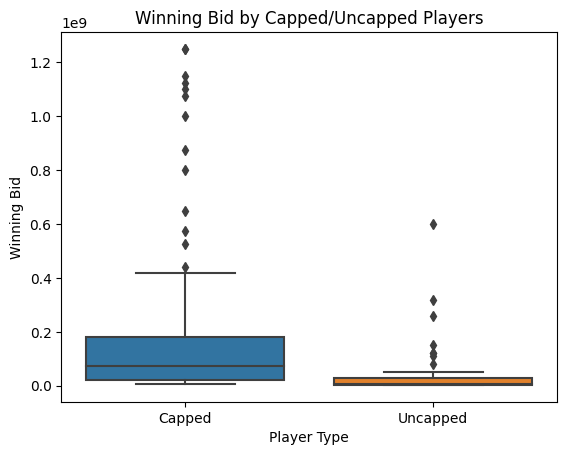

In [11]:
# Winning Bid by Capped/Uncapped
sns.boxplot(x='Capped/Uncapped', y='Winning Bid', data=df)
plt.title('Winning Bid by Capped/Uncapped Players')
plt.xlabel('Player Type')
plt.ylabel('Winning Bid')
plt.show()

## 6. Base Price vs Winning Bid

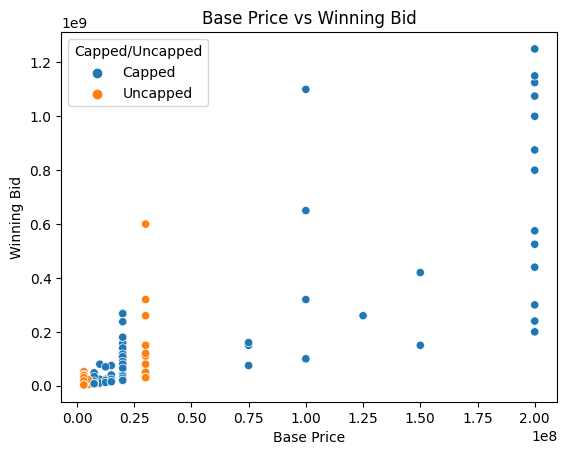

In [12]:
# Scatter plot of Base Price vs Winning Bid
sns.scatterplot(x='Base Price', y='Winning Bid', hue='Capped/Uncapped', data=df)
plt.title('Base Price vs Winning Bid')
plt.xlabel('Base Price')
plt.ylabel('Winning Bid')
plt.show()

## 7. Conclusion and Future Work
In this analysis, we explored the IPL 2025 auction data, uncovering insights into team strategies and player valuations. The data revealed interesting patterns in bidding strategies, particularly the differences between capped and uncapped players. Future work could involve predictive modeling to forecast winning bids based on player attributes and historical performance data. Additionally, incorporating more granular data such as player roles and past performance could enhance the analysis.

## Credits
This notebook was created by Abhishek Kumar